<a href="https://colab.research.google.com/github/NatSy77/projet_7/blob/main/P7_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implémentez un modèle de scoring #feature importance

## Importation

In [1]:
import joblib
import pandas as pd
import shap
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from joblib import load
from sklearn.impute import SimpleImputer

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Chargement des données et du model

In [3]:
#importation fichier
app_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_projet_7/data_modelisation/app_train.csv')
print('Training data shape: ', app_train.shape)

Training data shape:  (307511, 242)


In [4]:
app_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_projet_7/data_modelisation/app_test.csv')
print('Test data shape: ', app_test.shape)

Test data shape:  (48744, 241)


In [5]:
# Chemin vers le pipeline
pipeline_path = '/content/drive/MyDrive/Colab Notebooks/DS_projet_7/mlflow/706359919036996243/60d8b21cb8234d7fb49ce8a7d3ce505d/artifacts/LightGBM_pipeline.pkl'
print("Pipeline chargé avec succès.")
model = joblib.load(pipeline_path)  # Le fichier contient directement le modèle LightGBM
print("Modèle LightGBM chargé avec succès.")

Pipeline chargé avec succès.
Modèle LightGBM chargé avec succès.


## Préparation des données (comme pour la modelisation)

In [6]:
import re

# Supprimer la colonne 'Unnamed: 0' si elle existe
app_train = app_train.drop(columns=['Unnamed: 0'], errors='ignore')
app_test = app_test.drop(columns=['Unnamed: 0'], errors='ignore')

# Nettoyer les noms de colonnes
def clean_column_names(df):
    df.columns = (
        df.columns
        .str.strip()  # Supprime les espaces en début et fin
        .str.replace(r"[^\w]", "_", regex=True)  # Remplace tous les caractères non-alphanumériques par "_"
    )
    return df

app_train = clean_column_names(app_train)
app_test = clean_column_names(app_test)

In [7]:
print('Training data shape: ', app_train.shape)
print('Test data shape: ', app_test.shape)

Training data shape:  (307511, 241)
Test data shape:  (48744, 240)


In [8]:
# Chargement des données
if 'TARGET' in app_train.columns:
    train = app_train.drop(columns=['TARGET'])
    target = app_train['TARGET']
else:
    train = app_train.copy()
    target = None

# Vérification des valeurs manquantes avec SimpleImputer
if train.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='median')
    train = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)  # Conserver les noms des colonnes
else:
    train = train.copy()  # Conversion explicite si déjà propre

# Diviser les données en ensembles d'entraînement et de test (si `target` est défini)
if target is not None:
    X_train, X_test, y_train, y_test = train_test_split(
        train, target, test_size=0.2, random_state=42
    )
else:
    X_train, X_test, y_train, y_test = None, None, None, None
    print("Attention : Aucune étiquette ('target') n'a été fournie.")

# Appliquer la même transformation sur les données de test
app_test = app_test.drop(columns=['TARGET'], errors='ignore')  # Enlever la colonne TARGET si elle existe
app_test = pd.DataFrame(imputer.transform(app_test), columns=app_test.columns)  # Conserver les noms des colonnes

In [9]:
print('Training data shape: ', app_train.shape)
print('Test data shape: ', app_test.shape)

Training data shape:  (307511, 241)
Test data shape:  (48744, 240)


In [10]:
# Vérifier si la colonne TARGET (ou autre colonne de sortie) est présente
target_column = 'TARGET'
if target_column in app_train.columns:
    print(f"La colonne '{target_column}' a été détectée et sera exclue des features.")
    feature_names_transformed = app_train.drop(columns=[target_column]).columns.tolist()
else:
    feature_names_transformed = app_train.columns.tolist()

# Obtenir les importances des caractéristiques à partir du modèle
feature_importances = model.feature_importances_  # Cette ligne est ajoutée pour définir feature_importances

# Vérifier si les longueurs correspondent après exclusion
if len(feature_names_transformed) != len(feature_importances):
    print(f"Longueur des noms de colonnes après exclusion de TARGET : {len(feature_names_transformed)}")
    print(f"Longueur des importances : {len(feature_importances)}")

La colonne 'TARGET' a été détectée et sera exclue des features.


In [11]:
print(f"🔎 Features du modèle : {model.feature_name_}")
print(f"🔎 Features de `X_train` : {list(X_train.columns)}")
print(f"🔎 Features de `X_test` : {list(X_test.columns)}")

🔎 Features du modèle : ['Column_0', 'Column_1', 'Column_2', 'Column_3', 'Column_4', 'Column_5', 'Column_6', 'Column_7', 'Column_8', 'Column_9', 'Column_10', 'Column_11', 'Column_12', 'Column_13', 'Column_14', 'Column_15', 'Column_16', 'Column_17', 'Column_18', 'Column_19', 'Column_20', 'Column_21', 'Column_22', 'Column_23', 'Column_24', 'Column_25', 'Column_26', 'Column_27', 'Column_28', 'Column_29', 'Column_30', 'Column_31', 'Column_32', 'Column_33', 'Column_34', 'Column_35', 'Column_36', 'Column_37', 'Column_38', 'Column_39', 'Column_40', 'Column_41', 'Column_42', 'Column_43', 'Column_44', 'Column_45', 'Column_46', 'Column_47', 'Column_48', 'Column_49', 'Column_50', 'Column_51', 'Column_52', 'Column_53', 'Column_54', 'Column_55', 'Column_56', 'Column_57', 'Column_58', 'Column_59', 'Column_60', 'Column_61', 'Column_62', 'Column_63', 'Column_64', 'Column_65', 'Column_66', 'Column_67', 'Column_68', 'Column_69', 'Column_70', 'Column_71', 'Column_72', 'Column_73', 'Column_74', 'Column_75'

## Feature Importance Globale

In [12]:
# Vérifier la présence de la colonne TARGET
target_column = 'TARGET'
if target_column in app_train.columns:
    print(f"La colonne '{target_column}' a été détectée et sera exclue des features.")
    feature_names_transformed = app_train.drop(columns=[target_column]).columns.tolist()
else:
    feature_names_transformed = app_train.columns.tolist()

# Obtenir les importances des caractéristiques à partir du modèle
feature_importances = model.feature_importances_

# Vérifier si les longueurs correspondent après exclusion
if len(feature_names_transformed) != len(feature_importances):
    print(f"⚠️ Problème de correspondance des longueurs !")
    print(f"Nombre de colonnes après exclusion : {len(feature_names_transformed)}")
    print(f"Nombre d'importances récupérées : {len(feature_importances)}")

    # Vérifier quelles colonnes sont absentes
    missing_features = set(feature_names_transformed) - set(model.feature_name_)
    extra_features = set(model.feature_name_) - set(feature_names_transformed)

    if missing_features:
        print(f"❌ Colonnes absentes dans le modèle : {missing_features}")
    if extra_features:
        print(f"❌ Colonnes supplémentaires dans le modèle : {extra_features}")

    # Forcer la correspondance en prenant les features du modèle
    feature_names_transformed = model.feature_name_  # Prend les colonnes du modèle

# Créer un dataframe pour visualiser les résultats
importance_df = pd.DataFrame({
    'Feature': feature_names_transformed,
    'Importance': feature_importances
})

# Trier par importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les 20 caractéristiques les plus importantes
print(importance_df.head(20))

# Sauvegarder dans un fichier CSV
output_path = '/content/drive/MyDrive/Colab Notebooks/DS_projet_7/global_feature_importance.csv'
importance_df.to_csv(output_path, index=False)

print(f"✅ Importances globales sauvegardées dans : {output_path}")

La colonne 'TARGET' a été détectée et sera exclue des features.
                        Feature  Importance
31                 EXT_SOURCE_1         208
33                 EXT_SOURCE_3         189
6                    AMT_CREDIT         178
10                   DAYS_BIRTH         163
7                   AMT_ANNUITY         153
32                 EXT_SOURCE_2         146
8               AMT_GOODS_PRICE         127
11                DAYS_EMPLOYED         117
13              DAYS_ID_PUBLISH         112
81       DAYS_LAST_PHONE_CHANGE          92
12            DAYS_REGISTRATION          84
5              AMT_INCOME_TOTAL          70
0                    SK_ID_CURR          56
9    REGION_POPULATION_RELATIVE          51
14                  OWN_CAR_AGE          45
1            NAME_CONTRACT_TYPE          35
107  AMT_REQ_CREDIT_BUREAU_YEAR          31
24      HOUR_APPR_PROCESS_START          28
106   AMT_REQ_CREDIT_BUREAU_QRT          28
108               CODE_GENDER_F          28
✅ Importance

## Importances Locales (SHAP)

Calcul des importances locales (SHAP)...


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


Visualisation des importances locales avec SHAP...


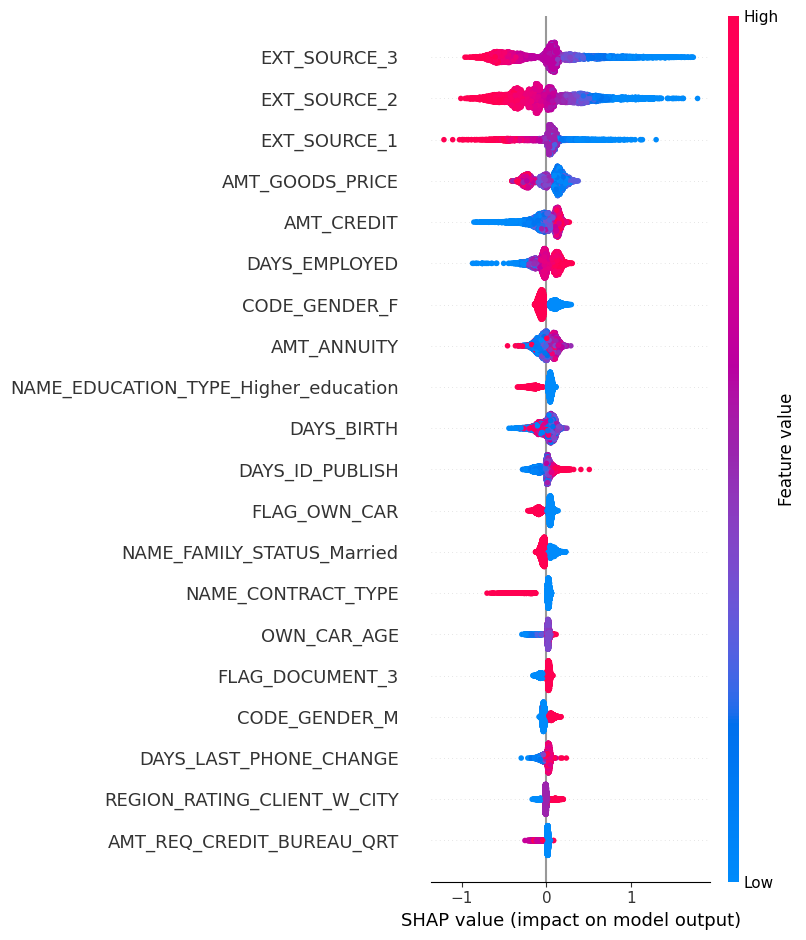

In [13]:
#Calcul des Importances Locales (SHAP)
print("Calcul des importances locales (SHAP)...")
# Réduire la taille de l'échantillon pour SHAP (10%)
X_sampled, _, y_sampled, _ = train_test_split(X_test, y_test, test_size=0.9, random_state=42)

# Créer un explainer SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sampled)

# Visualisation des importances locales
print("Visualisation des importances locales avec SHAP...")
shap.summary_plot(shap_values, X_sampled, feature_names=feature_names_transformed)

## Features sélectionnées

In [16]:
# Liste des 12 features sélectionnées
features_selectionnees = [
    "EXT_SOURCE_1", "EXT_SOURCE_3", "AMT_CREDIT", "DAYS_BIRTH", "AMT_ANNUITY",
    "EXT_SOURCE_2", "AMT_GOODS_PRICE", "DAYS_EMPLOYED", "DAYS_ID_PUBLISH",
    "DAYS_LAST_PHONE_CHANGE", "DAYS_REGISTRATION", "AMT_INCOME_TOTAL"
]

# Vérifier si toutes les features sont présentes
missing_features = [col for col in features_selectionnees if col not in X_test.columns]
if missing_features:
    print(f"❌ Les features suivantes sont absentes de `X_test` : {missing_features}")
else:
    print("✅ Toutes les features sélectionnées sont bien présentes.")

# Vérifier le type des données
print("\n🔎 Format des données pour chaque feature :")
print(X_test[features_selectionnees].dtypes)

# Vérifier les valeurs uniques pour les variables catégoriques
print("\n📊 Aperçu des valeurs uniques pour les features catégoriques :")
for col in features_selectionnees:
    if X_test[col].dtype == "object":
        print(f"🔹 {col} : {X_test[col].unique()}")

# Afficher un échantillon des données pour vérification
print("\n📌 Aperçu des premières valeurs des features sélectionnées :")
print(X_test[features_selectionnees].head())


✅ Toutes les features sélectionnées sont bien présentes.

🔎 Format des données pour chaque feature :
EXT_SOURCE_1              float64
EXT_SOURCE_3              float64
AMT_CREDIT                float64
DAYS_BIRTH                float64
AMT_ANNUITY               float64
EXT_SOURCE_2              float64
AMT_GOODS_PRICE           float64
DAYS_EMPLOYED             float64
DAYS_ID_PUBLISH           float64
DAYS_LAST_PHONE_CHANGE    float64
DAYS_REGISTRATION         float64
AMT_INCOME_TOTAL          float64
dtype: object

📊 Aperçu des valeurs uniques pour les features catégoriques :

📌 Aperçu des premières valeurs des features sélectionnées :
        EXT_SOURCE_1  EXT_SOURCE_3  AMT_CREDIT  DAYS_BIRTH  AMT_ANNUITY  \
245895      0.675878      0.000527    465457.5     13297.0      52641.0   
98194       0.430827      0.712155   1281712.5     14778.0      48946.5   
36463       0.527239      0.207964    495000.0     17907.0      39109.5   
249923      0.505998      0.614414    254700.0     19